In [1]:
import pandas as pd
from fep import FEP, load_features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

In [2]:
bids = pd.read_csv('../Data/facebook/bids.csv')
bidder = pd.read_csv('../Data/facebook/train.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../Data/facebook/bids.csv'

In [46]:
bids['country'].fillna(bids['country'].mode()[0], inplace = True)   # fill contry with the mode.

In [47]:
unique_bidders = pd.concat([bids['bidder_id'], bidder['bidder_id']]).unique()
bidder_mapping = {bidder_id: idx for idx, bidder_id in enumerate(unique_bidders)}
bids['encoded_bidder_id'] = bids['bidder_id'].map(bidder_mapping)
bidder['encoded_bidder_id'] = bidder['bidder_id'].map(bidder_mapping)
bids.drop('bidder_id', axis=1, inplace=True)
bidder.drop('bidder_id', axis=1, inplace=True)

In [48]:
bidder

,payment_account,address,outcome,encoded_bidder_id
0,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,1309
1,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0,2397
2,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0,2514
3,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0,6527
4,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0,238
...,...,...,...,...
2008,a1f85275793c4a782f0a668711f41b927ivc9,e6882cf204a9482edd042b6e31791dfctxzx8,0.0,4823
2009,a3d2de7675556553a5f08e4c88d2c2286s1m2,b9b03d5a127eb07aeb9163cdcf524e1344ac9,0.0,6495
2010,a3d2de7675556553a5f08e4c88d2c22856leq,d02c2b288b8aabd79ff47118aff41a2dqwzwc,0.0,2209
2011,fd87037ce0304077079c749f420f0b4c54uo0,f030a221726fbcdfc4dc7dfd1b381a112hieq,0.0,5380


In [49]:
bidder['address'].nunique()

2013

In [50]:
bidder['payment_account'].nunique()

2013

In [51]:
bidder.drop(['payment_account', 'address'], axis=1, inplace=True)

In [52]:
count_for_bidder = bids.groupby("encoded_bidder_id").nunique()

In [53]:
df_train_bidder = pd.merge(bidder, count_for_bidder, on='encoded_bidder_id', how='left') # drop the right 

We have calculated the counter for each feature. <br>
Let's rename them with more representative names.

In [54]:
df_train_bidder = df_train_bidder.rename(columns = {'bid_id': 'N_bids', 'auction': 'N_auctions', 'merchandise': 'N_merchandise', 'device': 'N_device', 'time': 'N_time', 'country': 'N_country', 'ip': 'N_ip', 'url': 'N_url'})

In [55]:
#df_train_bidder.drop('', axis=1, inplace=True)

In [56]:
df_train_bidder['bids/ulr'] = df_train_bidder['N_bids'] / df_train_bidder['N_url']
df_train_bidder['bids/ip'] = df_train_bidder['N_bids'] / df_train_bidder['N_ip']
df_train_bidder['bids/auctions'] = df_train_bidder['N_bids'] / df_train_bidder['N_auctions']
df_train_bidder['bids/country'] = df_train_bidder['N_bids'] / df_train_bidder['N_country']
df_train_bidder['bids/time'] = df_train_bidder['N_bids'] / df_train_bidder['N_time']

In [57]:
df_train_bidder = df_train_bidder.fillna(0) # fill NaN with 0 for bidders that never placed a bid
df_train_bidder.sort_values('encoded_bidder_id')

,outcome,encoded_bidder_id,N_bids,N_auctions,N_merchandise,N_device,N_time,N_country,N_ip,N_url,bids/ulr,bids/ip,bids/auctions,bids/country,bids/time
1366,0.0,1,19988.0,594.0,1.0,1029.0,18961.0,153.0,10316.0,4527.0,4.415286,1.937573,33.649832,130.640523,1.054164
1599,0.0,5,30062.0,787.0,1.0,403.0,27969.0,125.0,20492.0,295.0,101.905085,1.467012,38.198221,240.496000,1.074833
1870,0.0,9,192565.0,748.0,1.0,2020.0,122781.0,76.0,53405.0,36518.0,5.273153,3.605749,257.439840,2533.750000,1.568362
1969,0.0,12,9108.0,162.0,1.0,367.0,8895.0,23.0,6046.0,1886.0,4.829268,1.506451,56.222222,396.000000,1.023946
1719,0.0,13,84319.0,963.0,1.0,1610.0,68972.0,125.0,27560.0,13416.0,6.284958,3.059470,87.558671,674.552000,1.222511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,0.0,6638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1551,0.0,6639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1633,0.0,6640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1729,0.0,6641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [58]:
# check for null
for column in df_train_bidder.columns:
    if df_train_bidder[column].isnull().sum() > 0:
        print(column)

### Dealing with time

Although time was obscured, its order and scale were preserved, ensuring that it remains informative. The next crucial step is to extract new features from time.

We know that bot are faster than human, so we can try to understand how fast a bot bid in answer to the previous bid in the same auction.  

Bot can place bids simultaneously. We can check for each bidder the difference of time with the previous bid and count how many bid was placed simultaneously for each bidder.

We can try to understand more from time, for example if all the bids are placed in different days or month, could be that the data were taken from different periods, then we can exploit this information to extract more features.

Lets' try to calculate the difference of time between consecutive bids of the same bidder. 

In [59]:
df_time = bids.drop(['bid_id', 'country', 'merchandise', 'device', 'url', 'ip', 'auction'],axis=1, inplace=False)
temp = df_time.copy()
df_time['difference'] = temp.groupby('encoded_bidder_id').diff() 
# we can drop NaN that are the first bid of each bidder
df_time.dropna(inplace = True) 
df_time

,time,encoded_bidder_id,difference
10,9759243210526315,9,0.000000e+00
14,9759243263157894,0,1.052632e+08
23,9759243263157894,13,0.000000e+00
25,9759243315789473,1,1.578947e+08
27,9759243315789473,2,1.578947e+08
...,...,...,...
7656329,9709222052631578,2957,3.684211e+08
7656330,9709222052631578,3380,3.631579e+09
7656331,9709222052631578,2955,5.263158e+07
7656332,9709222052631578,3049,3.157895e+08


In [60]:
count_concurrent_bids = df_time[df_time['difference']==0].groupby('encoded_bidder_id').count().drop('time', axis=1)
count_concurrent_bids.rename(columns = {'difference': 'count_concurrent_bids'}, inplace=True)
count_concurrent_bids

,count_concurrent_bids
encoded_bidder_id,
0,10750
1,1027
2,22653
3,277
4,389
...,...
6440,67
6483,1
6529,3283


Add concurrent bid on our df_train_bidder

In [61]:
df_train_bidder = pd.merge(df_train_bidder, count_concurrent_bids, on='encoded_bidder_id', how='left').fillna(0)
df_train_bidder

,outcome,encoded_bidder_id,N_bids,N_auctions,N_merchandise,N_device,N_time,N_country,N_ip,N_url,bids/ulr,bids/ip,bids/auctions,bids/country,bids/time,count_concurrent_bids
0,0.0,1309,24.0,18.0,1.0,14.0,24.0,6.0,20.0,1.0,24.000000,1.200000,1.333333,4.0,1.000000,0.0
1,0.0,2397,3.0,1.0,1.0,2.0,3.0,1.0,3.0,2.0,1.500000,1.000000,3.000000,3.0,1.000000,0.0
2,0.0,2514,4.0,4.0,1.0,2.0,4.0,1.0,4.0,2.0,2.000000,1.000000,1.000000,4.0,1.000000,0.0
3,0.0,6527,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000,0.0
4,0.0,238,155.0,23.0,1.0,53.0,155.0,2.0,123.0,91.0,1.703297,1.260163,6.739130,77.5,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,0.0,4823,36.0,25.0,1.0,4.0,33.0,4.0,5.0,2.0,18.000000,7.200000,1.440000,9.0,1.090909,3.0
2009,0.0,6495,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000,0.0
2010,0.0,2209,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.000000,1.000000,2.000000,2.0,1.000000,0.0
2011,0.0,5380,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000,0.0


Now we can calculate all aggregate operations on the time differences for different groups, based on the encoded bidder ID.

In [62]:
#TO-DO
temp = df_time.groupby('encoded_bidder_id')['difference'].describe()

In [63]:
temp.drop(['count', '25%', '75%'], axis=1, inplace=True)
temp.rename(columns = {'mean': 'mean_difference', 'std': 'std_difference', 'min': 'min_difference', 'max':'max_difference', '50%':'median_difference'}, inplace=True)
temp

,mean_difference,std_difference,min_difference,median_difference,max_difference
encoded_bidder_id,,,,,
0,2.181642e+08,3.294133e+08,0.000000e+00,1.052632e+08,5.947368e+09
1,6.825358e+08,8.337212e+08,0.000000e+00,4.210526e+08,1.031579e+10
2,1.293853e+08,1.617732e+08,0.000000e+00,5.263158e+07,3.105263e+09
3,1.245161e+09,1.571379e+09,0.000000e+00,7.368421e+08,2.700000e+10
4,1.058529e+09,1.492866e+09,0.000000e+00,6.315789e+08,2.426316e+10
...,...,...,...,...,...
6574,1.099211e+11,1.554518e+11,0.000000e+00,1.099211e+11,2.198421e+11
6584,2.715789e+10,NaN,2.715789e+10,2.715789e+10,2.715789e+10
6592,1.254482e+09,6.580469e+09,0.000000e+00,3.157895e+08,7.057895e+10


In [64]:
df_train_bidder = pd.merge(df_train_bidder, temp, on='encoded_bidder_id', how='left').fillna(0)
df_train_bidder

,outcome,encoded_bidder_id,N_bids,N_auctions,N_merchandise,N_device,N_time,N_country,N_ip,N_url,...,bids/ip,bids/auctions,bids/country,bids/time,count_concurrent_bids,mean_difference,std_difference,min_difference,median_difference,max_difference
0,0.0,1309,24.0,18.0,1.0,14.0,24.0,6.0,20.0,1.0,...,1.200000,1.333333,4.0,1.000000,0.0,5.711121e+11,7.438736e+11,5.210526e+09,3.458421e+11,3.167632e+12
1,0.0,2397,3.0,1.0,1.0,2.0,3.0,1.0,3.0,2.0,...,1.000000,3.000000,3.0,1.000000,0.0,3.233579e+12,1.759654e+12,1.989316e+12,3.233579e+12,4.477842e+12
2,0.0,2514,4.0,4.0,1.0,2.0,4.0,1.0,4.0,2.0,...,1.000000,1.000000,4.0,1.000000,0.0,2.379000e+12,8.618847e+11,1.450842e+12,2.532053e+12,3.154105e+12
3,0.0,6527,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.0,1.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.0,238,155.0,23.0,1.0,53.0,155.0,2.0,123.0,91.0,...,1.260163,6.739130,77.5,1.000000,0.0,7.777888e+10,2.154285e+11,5.263158e+07,1.368421e+10,1.619211e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,0.0,4823,36.0,25.0,1.0,4.0,33.0,4.0,5.0,2.0,...,7.200000,1.440000,9.0,1.090909,3.0,2.099162e+12,9.464286e+12,0.000000e+00,6.842105e+08,5.605500e+13
2009,0.0,6495,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.0,1.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2010,0.0,2209,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,...,1.000000,2.000000,2.0,1.000000,0.0,9.798474e+12,0.000000e+00,9.798474e+12,9.798474e+12,9.798474e+12
2011,0.0,5380,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.0,1.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


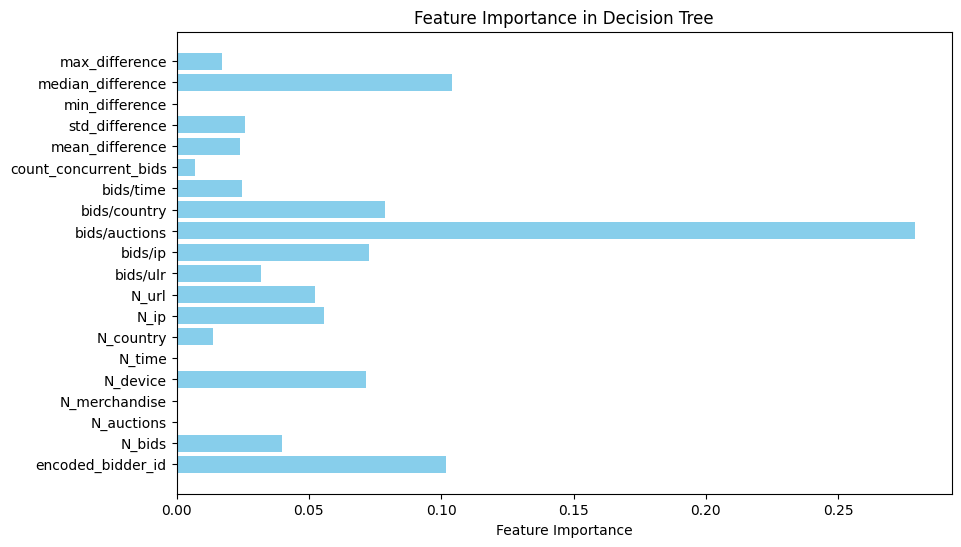

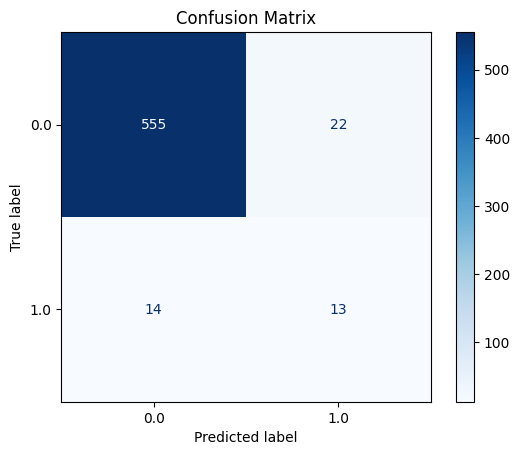

In [ ]:
def decision_tree_for_feature_importances(df_train_bidder):
    X = df_train_bidder.drop(columns=['outcome'])  
    y = df_train_bidder['outcome']


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train, y_train)


    importances = dt_model.feature_importances_
    feature_names = X.columns


    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, importances, color='skyblue')
    plt.xlabel("Feature Importance")
    plt.title("Feature Importance in Decision Tree")
    plt.show()


    y_pred = dt_model.predict(X_test)


    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=dt_model.classes_)
    disp.plot(cmap="Blues", values_format='d')
    plt.title("Confusion Matrix")
    plt.show()